In [1]:
import os
import matplotlib.pyplot as plt
import numpy as np

In [2]:
import cv2 as cv

In [3]:
print(len(os.listdir('archive/CrashBest/')))

75000


In [4]:
import pandas as pd

df = pd.read_csv('archive/Crash_Table.csv')

df.head()

,vidname,frame_1,frame_2,frame_3,frame_4,frame_5,frame_6,frame_7,frame_8,frame_9,...,frame_46,frame_47,frame_48,frame_49,frame_50,startframe,youtubeID,timing,weather,egoinvolve
0,1,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,285,0,Day,Normal,Yes
1,2,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,646,0,Day,Normal,Yes
2,3,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,972,0,Day,Normal,Yes
3,4,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1257,0,Day,Normal,Yes
4,5,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,462,10,Day,Snowy,Yes


In [6]:
PATH = "archive/CrashBest/"
IMG_WIDTH = 224
IMG_HEIGHT = 224

videos = {}

for i, file_name in enumerate(os.listdir(PATH)):
    
    parts = file_name.split('_')
    video_number = parts[1]
    
    video_number = int(video_number)
    
    if video_number > 100:
        break
    
    # Load the image
    image = cv.imread(os.path.join(PATH, file_name))
    image = cv.cvtColor(image, cv.COLOR_BGR2RGB)
    image = cv.resize(image, (IMG_WIDTH, IMG_HEIGHT))
    image = image / 255.0
    
    # Get the corresponding label for this video number
    label = df.loc[df['vidname'] == int(video_number)]  # Assuming df['vidname'] matches video_number
    
    # Create the data dictionary for this frame
    data = {
        'video_number': video_number,
        'image': image,
        'label': label
    }
    
    # Initialize the list for this video_number if not already done
    if video_number not in videos:
        videos[video_number] = []
    
    # Append the data to the corresponding video_number list
    videos[video_number].append(data)

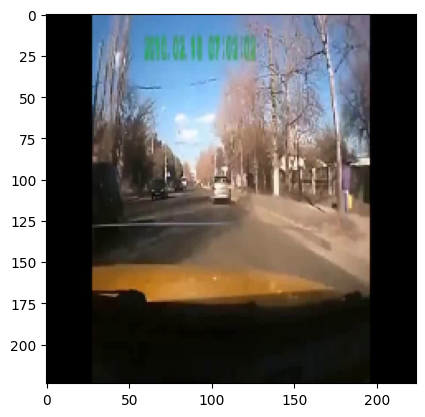

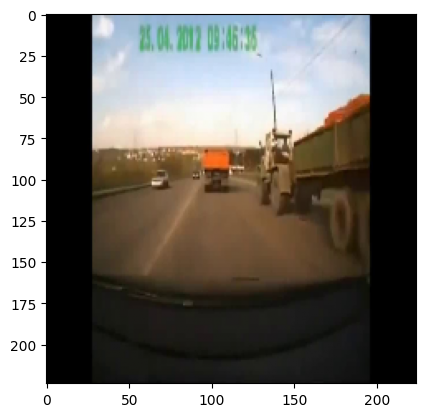

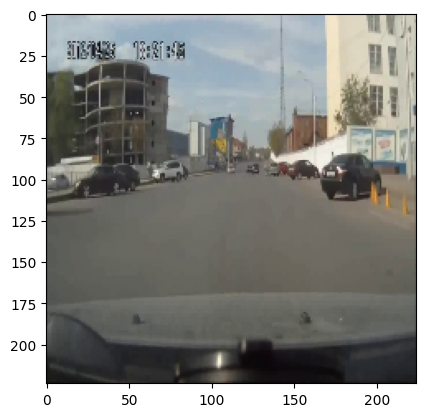

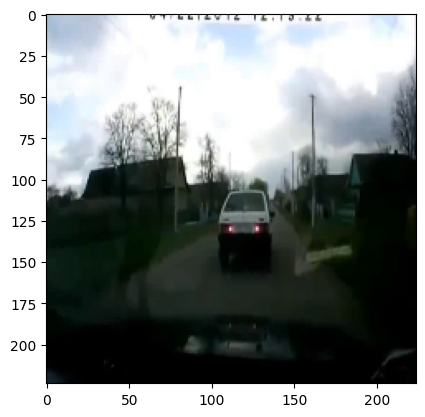

In [10]:
for i in range(1, 5):
    plt.imshow(videos[i][0]['image'])
    plt.show()